# Descrição do Trabalho

## Dataset
https://www.kaggle.com/sudalairajkumar/cryptocurrencypricehistory?select=coin_Bitcoin.csv
https://coinmarketcap.com/currencies/bitcoin/historical-data/

Usaremos as seguintes labels:

- up = 0 (Subiu o preço em relação ao anterior)
- down = 1 (Desceu o preço em relação ao anterior)
- same = 2 (Manteve o preço em relação ao anterior)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Loading Data and preprocessing

In [ ]:
raw_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/IA2/T2/XMR-Raw.csv")
print(raw_data.describe())

               SNo         High  ...        Volume     Marketcap
count  2602.000000  2602.000000  ...  2.602000e+03  2.602000e+03
mean   1301.500000    77.357637  ...  1.637467e+08  1.236534e+09
std     751.277024    96.070702  ...  9.193947e+08  1.534699e+09
min       1.000000     0.251757  ...  7.899570e+03  1.279606e+06
25%     651.250000     1.706342  ...  1.735218e+05  9.731418e+06
50%    1301.500000    52.737242  ...  2.466770e+07  8.558357e+08
75%    1951.750000   105.886750  ...  1.034612e+08  1.708818e+09
max    2602.000000   517.620245  ...  2.895912e+10  8.658968e+09

[8 rows x 7 columns]


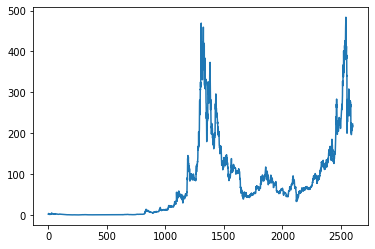

In [ ]:
plt.plot(raw_data["Close"])
plt.show()

In [ ]:
aux = []
for i in range(len(raw_data)):
  #print(raw_data["Date"][1])
  if(raw_data["Date"][i].split("-")[0] == "2020"):
    break
  aux.append(i)

raw_data=raw_data.drop(aux)
raw_data = raw_data.reset_index()
raw_data.head()

,index,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,2049,2050,Monero,XMR,2020-01-01 23:59:59,45.960216,44.502790,44.578461,45.753542,7.590315e+07,7.952546e+08
1,2050,2051,Monero,XMR,2020-01-02 23:59:59,46.214603,44.397277,45.764926,45.749471,8.164516e+07,7.952545e+08
2,2051,2052,Monero,XMR,2020-01-03 23:59:59,51.980942,45.642766,45.642766,51.092039,1.458267e+08,8.881971e+08
3,2052,2053,Monero,XMR,2020-01-04 23:59:59,51.545418,50.017022,51.054631,50.536695,6.195223e+07,8.786166e+08
4,2053,2054,Monero,XMR,2020-01-05 23:59:59,54.777560,50.536011,50.536011,54.096895,5.131611e+07,9.405880e+08


In [ ]:
variation = []
labels = ["up","down","same"]
for i in range(0,len(raw_data) - 1):
  if(raw_data["Close"][i+1]>raw_data["Close"][i]):
    variation.append(0)
    continue
  if(raw_data["Close"][i+1]<raw_data["Close"][i]):
    variation.append(1)
    continue
  if(raw_data["Close"][i+1]==raw_data["Close"][i]):
    variation.append(2)
    continue
variation = np.array(variation)
print(variation)

[0 0 1 ... 0 1 0]


In [ ]:

raw_data=raw_data.drop([0])
raw_data=raw_data.drop(['Marketcap',"SNo"], axis=1)
raw_data["Variation"] = variation


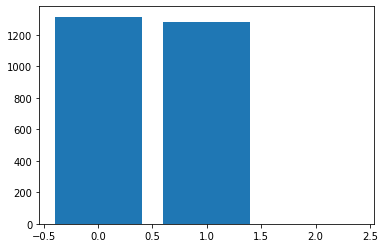

[1316, 1285, 0]


In [ ]:
var = [0,0,0]
for v in raw_data["Variation"]:
  var[int(v)]+=1
plt.bar([0,1,2],var)
plt.show()
print(var)

In [ ]:
raw_data.to_csv("/content/drive/MyDrive/Colab Notebooks/IA2/T2/XMR-Processed.csv")
raw_data.head()


,Name,Symbol,Date,High,Low,Open,Close,Volume,Variation
1,Monero,XMR,2014-05-23 23:59:59,3.43437,2.05104,2.05104,2.96302,266852.000000,0
2,Monero,XMR,2014-05-24 23:59:59,4.01424,2.61778,2.92039,3.70245,248028.000000,0
3,Monero,XMR,2014-05-25 23:59:59,4.04303,2.80330,4.04303,3.13856,283545.000000,1
4,Monero,XMR,2014-05-26 23:59:59,3.76235,2.31202,3.21897,3.02186,220148.000000,1
5,Monero,XMR,2014-05-27 23:59:59,3.03380,2.06525,3.03380,2.20823,97602.601562,1


# Building the model

In [ ]:
btc_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/IA2/T2/XMR-Processed.csv")
x,y = [],btc_data["Variation"]
for i in range(len(btc_data)):
  x.append(
      np.array(
          [
           btc_data["High"][i],
           btc_data["Low"][i],
           btc_data["Open"][i],
           btc_data["Close"][i],
           btc_data["Volume"][i]
          ]))

x = np.array(x)
print(x.shape)
print(y.shape)

(2601, 5)
(2601,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.13, random_state=42)
X_train.shape

(2262, 5)

In [ ]:
import tensorflow as tf
from tqdm import tqdm

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=X_train[0].shape),

  tf.keras.layers.Dense(100, activation='tanh'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(48, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(20, activation='tanh'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(20, activation='relu'),
  tf.keras.layers.Dropout(0.2),

  tf.keras.layers.Dense(3, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 5)                 0         
_________________________________________________________________
dense_18 (Dense)             (None, 100)               600       
_________________________________________________________________
dropout_14 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 48)                4848      
_________________________________________________________________
dropout_15 (Dropout)         (None, 48)                0         
_________________________________________________________________
dense_20 (Dense)             (None, 20)                980       
_________________________________________________________________
dropout_16 (Dropout)         (None, 20)               

In [ ]:
epochs = 500
hist = model.fit(X_train, y_train, epochs=epochs)
print("---------")
model.evaluate(X_test,  y_test, verbose=2)

Epoch 1/500
71/71 [==============================] - 1s 2ms/step - loss: 0.8882 - accuracy: 0.4805
Epoch 2/500
71/71 [==============================] - 0s 2ms/step - loss: 0.8041 - accuracy: 0.4903
Epoch 3/500
71/71 [==============================] - 0s 2ms/step - loss: 0.7537 - accuracy: 0.4982
Epoch 4/500
71/71 [==============================] - 0s 2ms/step - loss: 0.7394 - accuracy: 0.4845
Epoch 5/500
71/71 [==============================] - 0s 2ms/step - loss: 0.7140 - accuracy: 0.5146
Epoch 6/500
71/71 [==============================] - 0s 2ms/step - loss: 0.7147 - accuracy: 0.5000
Epoch 7/500
71/71 [==============================] - 0s 2ms/step - loss: 0.7131 - accuracy: 0.5018
Epoch 8/500
71/71 [==============================] - 0s 2ms/step - loss: 0.7083 - accuracy: 0.4951
Epoch 9/500
71/71 [==============================] - 0s 2ms/step - loss: 0.7042 - accuracy: 0.5088
Epoch 10/500
71/71 [==============================] - 0s 2ms/step - loss: 0.7022 - accuracy: 0.4965
Epoch 11/

[0.6928068399429321, 0.525073766708374]

In [ ]:
aux = 0
acc = []
batch = 10
for i in range(len(hist.history['accuracy'])):
  aux+=hist.history['accuracy'][i]
  if i%batch == 0 and i != 0:
    acc.append(aux/batch)
    aux = 0

aux = 0
lss = []
for i in range(len(hist.history['loss'])):
  aux+=hist.history['loss'][i]
  if i%batch == 0 and i != 0:
    lss.append(aux/batch)
    aux = 0

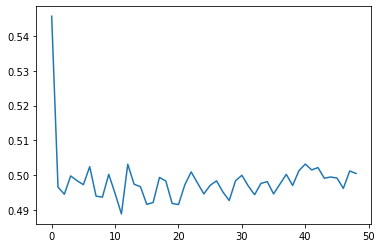

In [ ]:
plt.plot(acc)
plt.show()

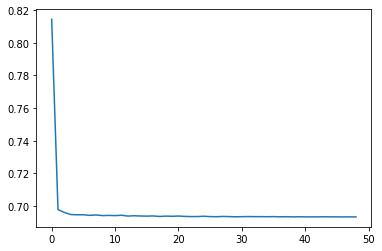

In [ ]:
plt.plot(lss)
plt.show()

In [ ]:
print(btc_data["Volume"][len(btc_data) - 1])

167861959.49


## BTC
| Date | Open | High | Low | Close | Volume | Market Cap |
|---|---|---|---|---|---|---|
| Aug 08 2021 | 44574.44 | 45282.35 | 43331.91 | 43798.12 | 36302664750 | 822545074286 |
| Aug 07 2021 | 42832.80 | 44689.86 | 42618.57 | 44555.80 | 40030862141 | 836730623772 |
| Aug 06 2021 | 40865.87 | 43271.66 | 39932.18 | 42816.50 | 38226483046 | 804022903682 |
| Aug 05 2021 | 39744.51 | 41341.93 | 37458.00 | 40869.55 | 35185031017 | 767423192906 |
| Aug 04 2021 | 38213.33 | 39952.30 | 37589.17 | 39747.51 | 25372562724 | 746313542791 |

## XMR
| Date  | High | Low| Open | Close | Volume | Market Cap |
|---|---|---|---:|---:|---:|---:|
| Aug 08 2021  | 274.52 | 256.28| 271.34 | 256.85 | 227195719 | 4615475192 |
| Aug 07 2021  | 275.88 | 259.61| 262.96 | 270.98 | 233040691 | 4869129158 |
| Aug 06 2021  | 266.35 | 250.83| 252.88 | 263.04 | 260143244 | 4726236998 |
| Aug 05 2021  | 253.83 | 237.32| 245.09 | 252.86 | 245048086 | 4543253747 |
| Aug 04 2021  | 245.65 | 223.15| 225.63 | 244.97 | 217332184 | 4401263016 |
| Aug 03 2021  | 236.76 | 223.67| 232.80 | 225.20 | 181967424 | 4045869297 |
| Aug 02 2021  | 244.15 | 228.63| 236.00 | 233.07 | 183571683 | 4187141800 |
| Aug 01 2021  | 249.38 | 232.57| 239.66 | 236.23 | 196766251 | 4243833052 |
| Jul 31 2021  | 249.07 | 234.51| 242.40 | 240.17 | 208721836 | 4314421492 |


In [ ]:
res = model.predict(np.array([ [245.65,	223.15,	225.63,	244.97,	217332184	]]))
res = res/res.sum()
print(res)
print(labels[res.argmax()]) # should be up

[[5.0173062e-01 4.9826825e-01 1.1153702e-06]]
up


In [ ]:
res = model.predict(np.array([ [275.88,	259.61,	262.96,	270.98,	233040691]]))
res = res/res.sum()
print(res)
print(labels[res.argmax()])  # should be down

[[5.0173062e-01 4.9826825e-01 1.1153702e-06]]
up
